# PySpark Cluster Setup & Distributed Data Processing

##Install and set up Pyspark and its associated requirements:

First, you need to install PySpark required libraries:  

In [ ]:
 !pip install pyspark
 !pip install findspark

Second, you need to ba able to import the following libraries:

In [ ]:
#This module provides a portable way of using operating system dependent functionality like open(), read() and write()
import os
import findspark
import pandas as pd
findspark.init()
# only run after findspark.init()
import pyspark
# In order to work with pyspark you need
from pyspark.sql import SparkSession

## Task 1: Initializing a spark cluster (2 pts)

In [ ]:
# Your code goes here
# Initializing a Spark cluster
spark = SparkSession.builder \
    .appName("RestaurantAnalysis") \
    .getOrCreate()

## Task 2: Verify the initialization step has been done sussessfully (2 pts)

In [ ]:
# Your code goes here
df = spark.sql('''select 'spark' as hello''')
df.show()

+-----+
|hello|
+-----+
|spark|
+-----+



## Task 3: Get restaurant data from any state or city in Canada or USA using Yelp API (5 pts)

Let's extract information using Yelp API about restaurants in that city (for example: Calgary, AB). The restaurants need to have wifi and parking space.

In [ ]:

# Your code goes here

import requests

api_key = 'ar7kpbU4u8tjQyhjhmyZmpESPBbStFJfBtdn3IZL6WKlOf89VDyvLWJxqtVjfEUm4eKhgr4LUFD-EbZ5xHdSSbbdnUE0Pszkl6IYwmYBLMABIeGIv1un4mn99yjvZ3Yx'

endpoint_url = 'https://api.yelp.com/v3/businesses/search'

headers = {

    'Authorization': f'Bearer {api_key}',

}

params = {

    'term': 'restaurants',

    'wifi_free': True,

    'parking_space': True,

    'location': 'New York',

    'limit': 50

}

response = requests.get(endpoint_url, headers=headers, params=params)

Yelp_data = response.json()

Yelp_data


{'businesses': [{'id': 'zRXMvxUX_rOliKZPpkWi_g',
   'alias': 'valerie-new-york',
   'name': 'Valerie',
   'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/mnH5QFkSMzZgd6P5eSZvvw/o.jpg',
   'is_closed': False,
   'url': 'https://www.yelp.com/biz/valerie-new-york?adjust_creative=Bd7HTqoN4lNqXPMEwxy4Qg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=Bd7HTqoN4lNqXPMEwxy4Qg',
   'review_count': 1177,
   'categories': [{'alias': 'newamerican', 'title': 'New American'},
    {'alias': 'cocktailbars', 'title': 'Cocktail Bars'}],
   'rating': 4.3,
   'coordinates': {'latitude': 40.756326, 'longitude': -73.981117},
   'transactions': ['delivery'],
   'price': '$$',
   'location': {'address1': '45 W 45th St between 5th & 6th Ave',
    'address2': '',
    'address3': None,
    'city': 'New York',
    'zip_code': '10036',
    'country': 'US',
    'state': 'NY',
    'display_address': ['45 W 45th St between 5th & 6th Ave',
     'New York, NY 10036']},
   'phone': '+12123024

## Task 4: Create table using PySpark on restaurant data (6 pts)

Now, create a table `<YourCityName>_restaurants` using PySpark dataframe using the above extracted data and show the content of this dataframe. (You need to create a PySpark dataframe and then a Temp Table)

In [ ]:
# Your code goes here

# Extract relevant restaurant data
data = response.json()
restaurants = []
for business in Yelp_data["businesses"]:
    restaurants.append({
        "name": business["name"],
        "rating": business["rating"],
        "review_count": business["review_count"],
        "address": ", ".join(business["location"]["display_address"]),
        "wifi": "wifi_free" in business.get("attributes", {}),
        "parking": "parking_space" in business.get("attributes", {})
    })

# Create DataFrame
restaurants_df = spark.createDataFrame(restaurants)

# Create temporary view
restaurants_df.createOrReplaceTempView("NewYork_restaurants")

# Show the table
restaurants_df.show()



+--------------------+--------------------+-------+------+------------+-----+
|             address|                name|parking|rating|review_count| wifi|
+--------------------+--------------------+-------+------+------------+-----+
|45 W 45th St betw...|             Valerie|  false|   4.3|        1177|false|
|145 W 53rd St, Ne...| La Grande Boucherie|  false|   4.4|        3926|false|
|60 E 54th St, New...|          Monkey Bar|  false|   4.3|         254|false|
|19 Old Fulton St,...|           Juliana's|  false|   4.4|        2880|false|
|89 South St, Pier...|          Carne Mare|  false|   4.4|         324|false|
|22 W 8th St, New ...|Amélie west villa...|  false|   4.3|        2981|false|
|235 Mulberry St, ...|            Rubirosa|  false|   4.3|        3555|false|
|251 Broome St, Ne...|               Kalye|  false|   4.5|         270|false|
|342 E 6th St, New...|                Raku|  false|   4.4|        1768|false|
|174 2nd Ave, New ...|            LoveMama|  false|   4.4|      

## Task 5: Query the Restaurants Table (5 pts)

Extract key information, including the name, the number of reviews, rating, and address for each restaurant and the review_count should be greater than 20. Sort the data in descending order based on Yelp ratings and review count (Both DESC) and present only the top 20 results.

In [ ]:
# Your code goes here

top_restaurants = spark.sql("""
    SELECT name, rating, review_count, address
    FROM NewYork_restaurants
    WHERE review_count > 20
    ORDER BY rating DESC, review_count DESC
    LIMIT 20
""")

# Show the results
top_restaurants.show(truncate=False)

+-------------------+------+------------+-------------------------------------+
|name               |rating|review_count|address                              |
+-------------------+------+------------+-------------------------------------+
|Red Onion          |4.8   |119         |277 East 10th St, New York, NY 10009 |
|Cecily             |4.8   |35          |80 Franklin St, Brooklyn, NY 11222   |
|Gurumé             |4.7   |258         |313 W 46th St, New York, NY 10036    |
|Leitao             |4.7   |225         |547 Hudson St, New York, NY 10014    |
|SaiTong Thai       |4.6   |290         |244 W 48th St, New York, NY 10036    |
|8282               |4.6   |271         |84 Stanton St, New York, NY 10002    |
|Lola's             |4.6   |55          |2 W 28th St, New York, NY 10001      |
|Dutch Freds        |4.5   |2207        |307 W 47th St, New York, NY 10036    |
|Soothr             |4.5   |1595        |204 E 13th St, New York, NY 10003    |
|Don Angie          |4.5   |984         

## Task 6: Table Data Analysis using Charts (5 pts)
Use Matplotlib to create a comparison of the top 5 restaurants in your city based on their ratings. Your visualization should display the following:

- Restaurant Ratings: Highlight the rating of each restaurant.
- Number of Reviews: Show how many reviews each restaurant received.

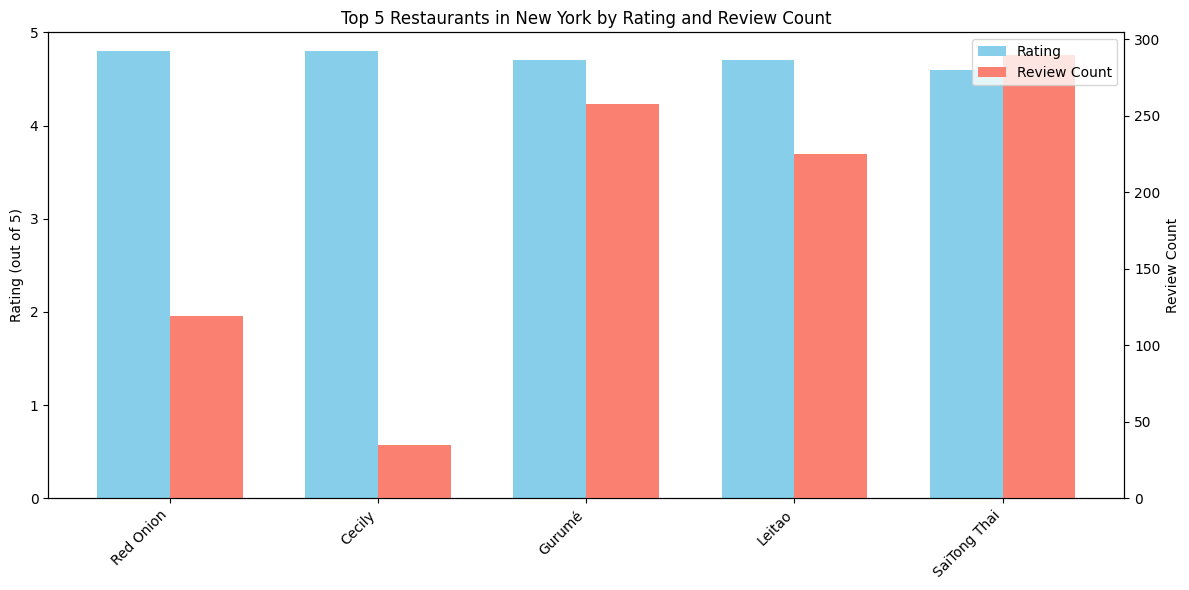

- The restaurant with the highest rating is: Red Onion
- The restaurant with the highest number of reviews is: SaiTong Thai


In [ ]:
# Your code goes here
# Your code goes here
import matplotlib.pyplot as plt
import numpy as np

# Get the top 5 restaurants as a Pandas DataFrame for visualization
top_5_df = top_restaurants.limit(5).toPandas()

# Set up the figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Create positions for the bars
x = np.arange(len(top_5_df))
width = 0.35

# Plot ratings
rects1 = ax1.bar(x - width/2, top_5_df['rating'], width, label='Rating', color='skyblue')
ax1.set_ylabel('Rating (out of 5)')
ax1.set_ylim(0, 5)
ax1.set_title('Top 5 Restaurants in New York by Rating and Review Count')

# Create a second y-axis for review count
ax2 = ax1.twinx()
rects2 = ax2.bar(x + width/2, top_5_df['review_count'], width, label='Review Count', color='salmon')
ax2.set_ylabel('Review Count')

# Add labels, title, and legend
ax1.set_xticks(x)
ax1.set_xticklabels(top_5_df['name'], rotation=45, ha='right')
fig.tight_layout()

# Combine legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

plt.show()

# Analysis conclusion
print("- The restaurant with the highest rating is:", top_5_df.iloc[0]['name'])
print("- The restaurant with the highest number of reviews is:", top_5_df.loc[top_5_df['review_count'].idxmax()]['name'])

Which restaurant would you visit according to your analysis: The one with the highest rating, or the one with the highest number of reviews. Or is it a restaurant having a mix or both?



**The choice for me ould be a restaurant having a mix of both. I would likely choose a restaurant that has both a high rating (4.7 or above) and a substantial number of reviews, as this indicates both quality and consistency. For example: Cecily **